In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load datasets
train_data = pd.read_excel('../data/train_data.xlsx')
test_data = pd.read_excel('../data/test_data.xlsx')

In [5]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

Missing Values:
 customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


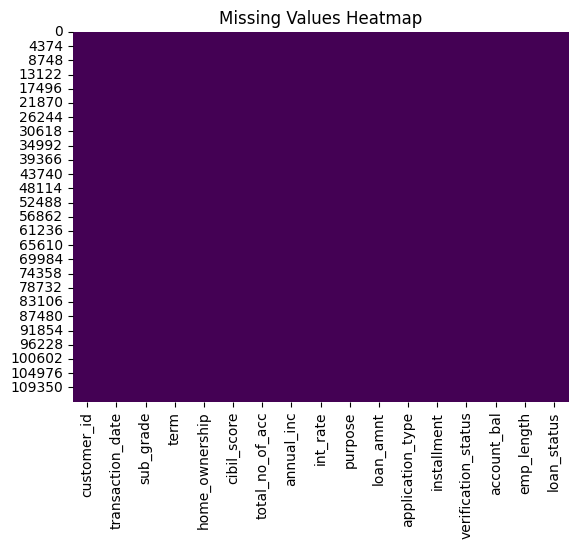

In [6]:
# Check for missing values
missing_values = train_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing values
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


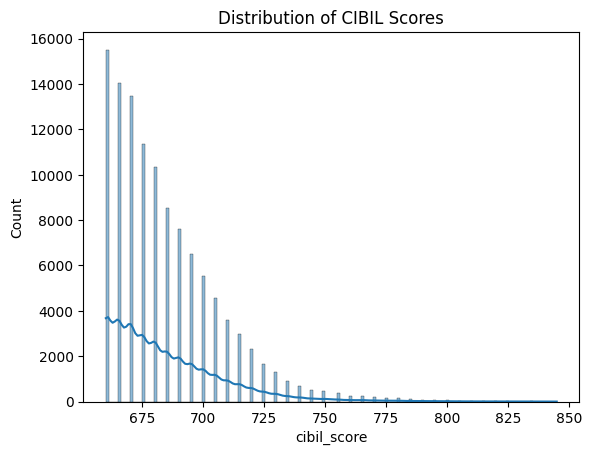

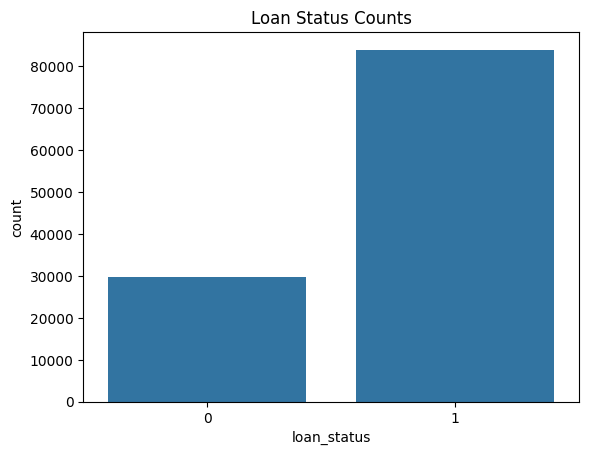

In [7]:
# Distribution of CIBIL Scores
sns.histplot(train_data['cibil_score'], kde=True)
plt.title('Distribution of CIBIL Scores')
plt.show()

# Default vs Non-default
sns.countplot(x='loan_status', data=train_data)
plt.title('Loan Status Counts')
plt.show()


Numeric Columns:
 Index(['customer_id', 'cibil_score', 'total_no_of_acc', 'annual_inc',
       'int_rate', 'loan_amnt', 'installment', 'account_bal', 'emp_length',
       'loan_status'],
      dtype='object')


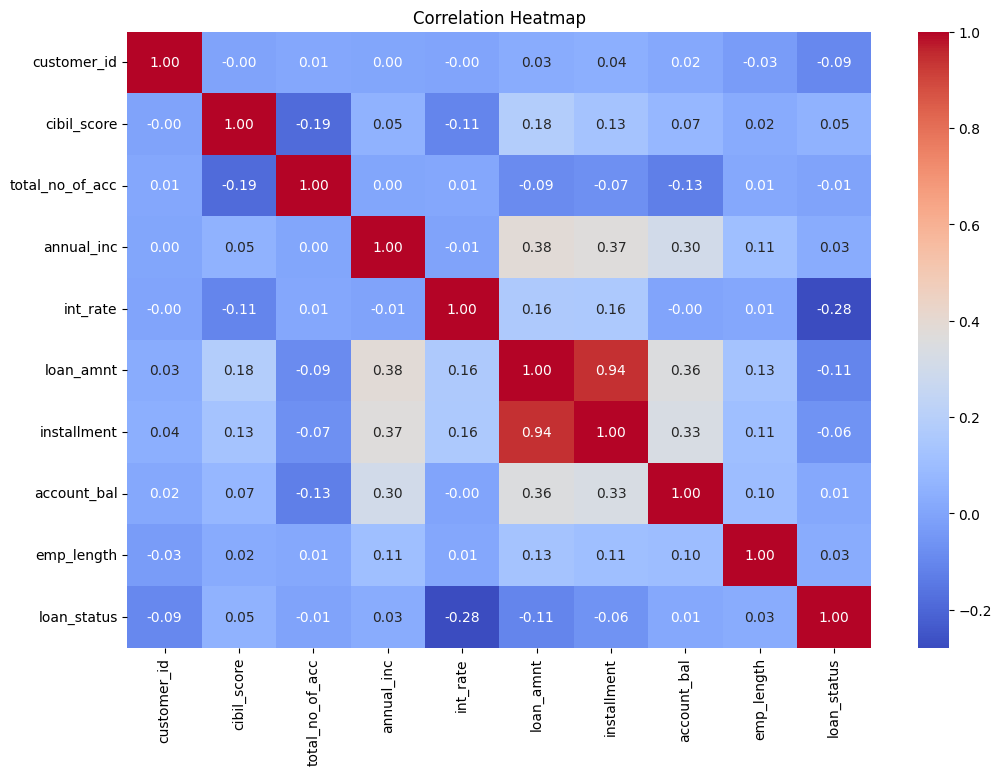

In [9]:
# Identify numeric columns only
numeric_data = train_data.select_dtypes(include=[np.number])

# Check the selected columns
print("Numeric Columns:\n", numeric_data.columns)

# Compute correlation matrix
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# Fill missing values
train_data['emp_length'] = train_data['emp_length'].fillna(train_data['emp_length'].median())
train_data = train_data.dropna()  # Drop rows with remaining missing values
